# Implement a linear regression model to predict the prices of houses: based on their square footage and the number of bedrooms and bathrooms.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as exp
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import StackingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("train.csv")
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
print(df.isna().sum().sort_values(ascending=False).head(20))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64


In [6]:
# According to the required statement, these columns are the most important

columns = [
    "LotArea",
    "OverallQual",
    "BsmtFullBath",
    "BsmtHalfBath",
    "FullBath",
    "HalfBath",
    "BedroomAbvGr",
    "KitchenAbvGr",
    "TotRmsAbvGrd",
    "TotalBsmtSF",
    "1stFlrSF",
    "2ndFlrSF",
    "LowQualFinSF",
    "GrLivArea",
]
target = ["SalePrice"]

In [7]:
X = df[columns]
y = np.log1p(df[target])

In [8]:
X.isna().sum()

LotArea         0
OverallQual     0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
dtype: int64

In [9]:
y.isna().sum()

SalePrice    0
dtype: int64

In [10]:
test_df = pd.read_csv("test.csv")
test_X = test_df[columns]
test_X.isna().sum()

LotArea         0
OverallQual     0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
TotalBsmtSF     1
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
dtype: int64

In [11]:
test_X.BsmtFullBath.fillna(0, inplace=True)
test_X.BsmtHalfBath.fillna(0, inplace=True)
test_X.TotalBsmtSF.fillna(test_X.TotalBsmtSF.mean(), inplace=True)

In [12]:
test_X.isna().sum()

LotArea         0
OverallQual     0
BsmtFullBath    0
BsmtHalfBath    0
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
dtype: int64

In [13]:
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=42)

In [14]:
train_X.shape, val_X.shape, train_y.shape, val_y.shape

((1095, 14), (365, 14), (1095, 1), (365, 1))

In [15]:
model = LinearRegression()
model.fit(train_X, train_y)
model.score(train_X, train_y)

0.7973258730751758

In [16]:
model.score(val_X, val_y)

0.8385738612280865

In [17]:
mean_squared_error(val_y, model.predict(val_X), squared=False)

0.1671887590171433

In [18]:
mean_squared_error(train_y, model.predict(train_X), squared=False)

0.1770615192852339

In [19]:
pd.concat([test_df.Id, pd.DataFrame(model.predict(test_X))], axis=1).to_csv(
    "submission.csv", index=False, header=["Id", "SalePrice"]
)
# Score: 0.33172

In [20]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

estimators = [
    ("lr1", LinearRegression()),
    ("lr2", Ridge(random_state=42)),
    ("lr3", Lasso(random_state=42)),
    ("lr4", ElasticNet(random_state=42)),
    ("rt", RandomForestRegressor(random_state=42)),
    ("gb", GradientBoostingRegressor(random_state=42)),
]

stacking_model = StackingRegressor(
    estimators=estimators, final_estimator=LinearRegression()
)

stacking_model.fit(train_X, train_y)

stacking_pred = stacking_model.predict(val_X)
mean_squared_error(val_y, stacking_pred, squared=False)

0.15604962509677361

In [21]:
pd.concat(
    [test_df.Id, pd.DataFrame(np.expm1(stacking_model.predict(test_X)))], axis=1
).to_csv("submission.csv", index=False, header=["Id", "SalePrice"])
# Score: 0.16934
# After skewing the target, the score is 0.16042

Text(0.5, 1.0, 'Prices of House - True vs Predictions (Task - 1)')

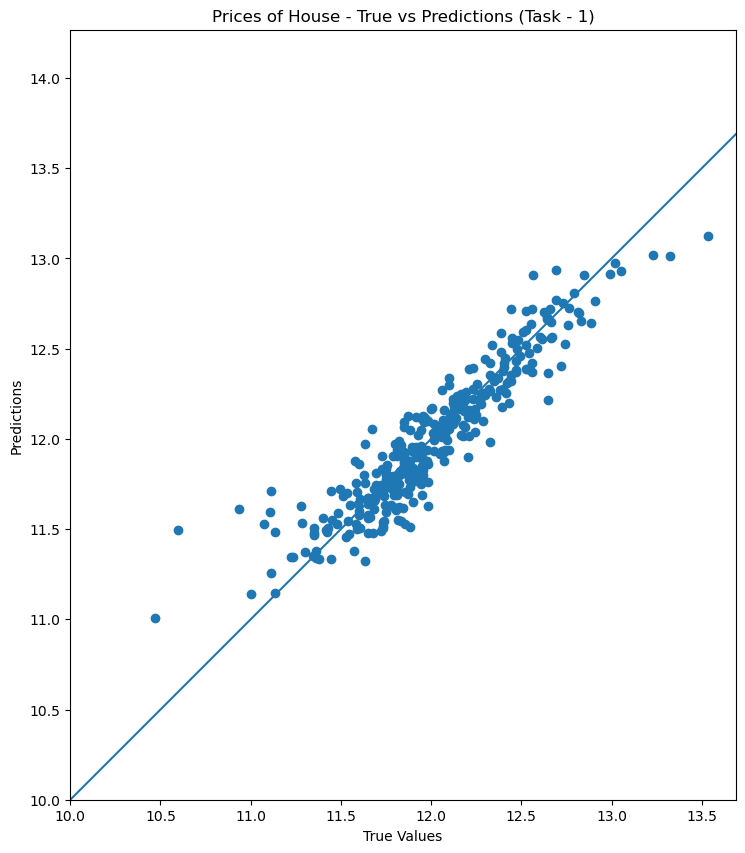

In [46]:
plt.figure(figsize=(100, 10))
plt.scatter(val_y, stacking_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.axis("equal")
plt.axis("square")
plt.xlim([10, plt.xlim()[1]])
plt.ylim([10, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
plt.title("Prices of House - True vs Predictions (Task - 1)")